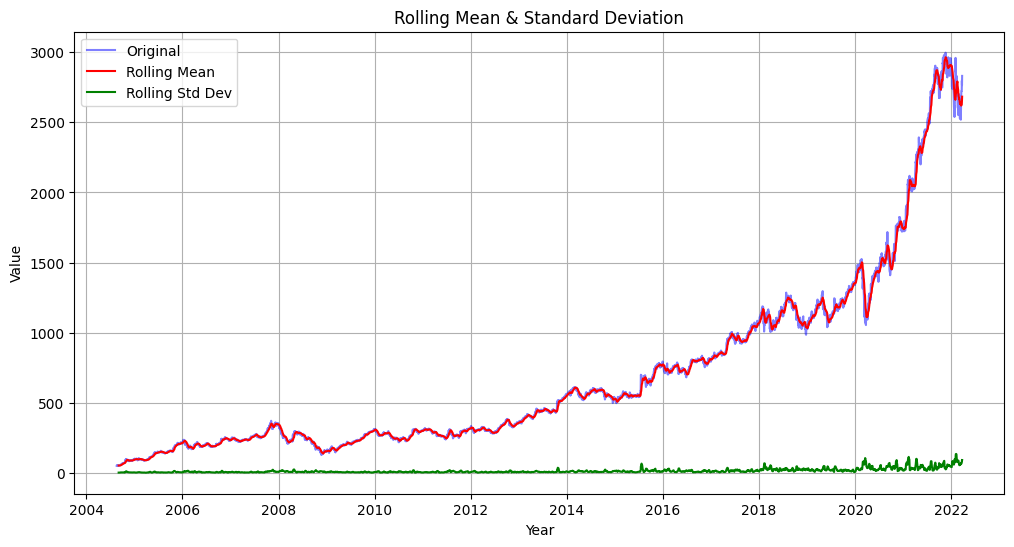

Results of Augmented Dickey-Fuller Test:
Test Statistic             3.200981
p-value                    1.000000
# Lags Used               27.000000
# Observations Used     4403.000000
Critical Value (1%)       -3.431836
Critical Value (5%)       -2.862197
Critical Value (10%)      -2.567120
dtype: float64


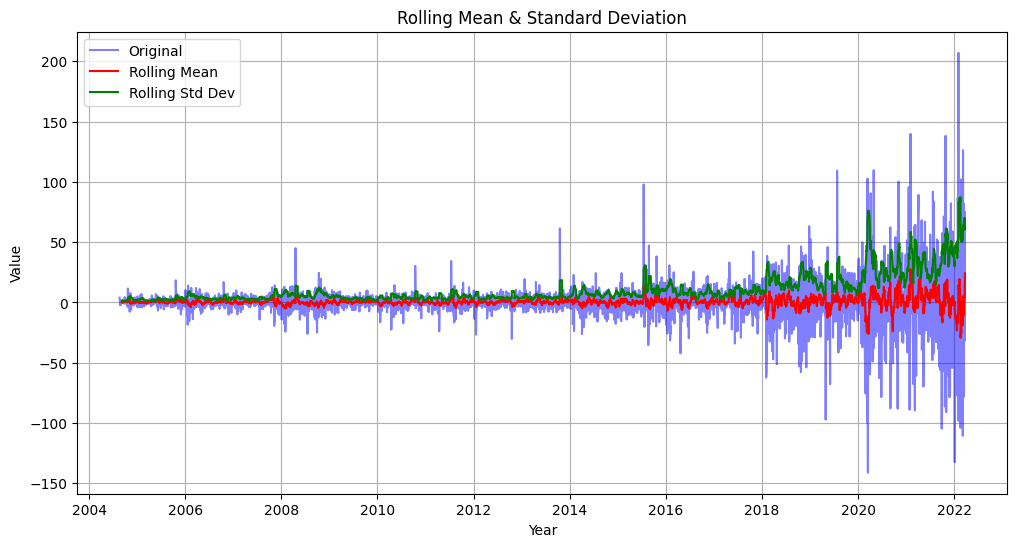

Results of Augmented Dickey-Fuller Test:
Test Statistic         -1.372710e+01
p-value                 1.158566e-25
# Lags Used             2.600000e+01
# Observations Used     4.403000e+03
Critical Value (1%)    -3.431836e+00
Critical Value (5%)    -2.862197e+00
Critical Value (10%)   -2.567120e+00
dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


file_path = "/content/GOOGL.csv"
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


def test_stationarity(timeseries):

    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()


    plt.figure(figsize=(12,6))
    plt.plot(timeseries, label="Original", color='blue', alpha=0.5)
    plt.plot(rolling_mean, label="Rolling Mean", color='red')
    plt.plot(rolling_std, label="Rolling Std Dev", color='green')
    plt.title("Rolling Mean & Standard Deviation")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()


    print("Results of Augmented Dickey-Fuller Test:")
    adf_test = adfuller(timeseries.dropna(), autolag="AIC")
    results = pd.Series(adf_test[:4], index=["Test Statistic", "p-value", "# Lags Used", "# Observations Used"])
    for key, value in adf_test[4].items():
        results[f"Critical Value ({key})"] = value
    print(results)


test_stationarity(df['Close'])

df['Close_Diff'] = df['Close'].diff()
df_diff = df['Close_Diff'].dropna()

test_stationarity(df_diff)
